# Práctica Tweeter

## Autor: Julián Melero Hidalgo

## Introducción

Una empresa nos ha pedido que estudiemos la forma en la que podemos incrementar la base de usuarios. Nos ha venido a la mente que podemos usar la red social Twitter como fuente de información, ya que esta empresa usa de forma asidua esta red.

Basándonos en Twitter, nuestra idea es ver de qué forma podemos predecir si un Tweet creado por esta empresa será o no "popular".

Para realizar el análisis nos basaremos en dos ficheros CSV tras realizar consultas a la API de Twitter:

* Handles-data.csv: la cabecera de la cuenta
* Tweets-data.csv: los datos de los tweets

## Resumen

En este proyecto hemos realizado los pasos básicos para la creación de un modelo ML, como son:
* Target
* Análisis
    * Cabecera
    * Tweets
* Unión de los datos
* Variables de interés
* Variables Independientes para el modelo
* Separación de datos
* Modelo

Antes de empezar con el análisis, y así poder entender mejor el problema, se han estudiado los requisitos del proyecto, así en la forma en la que funciona Twitter.
Al empezar a analizar hemos decidido separarlo en cabecera y tweet, ya que de esta forma podemos analizar los datos con mayor perspectiva. Hemos como visto los datos de la cabecera nos dan información sobre la cuenta del usuario y twitter, mientras que la otra parte es el propio tweet. Tras ello unimos los datos de ambas partes por el "username".

En las varibales de interés hemos estudiado la diferencia entre los "nlikes" y los "likes", llegando a la conlusión de que los likes son aquellos me gusta que ha dado elusuario, mientras que los "nlikes" son los me gusta que contiene el tweet.
También hemos visto la gran correlación de los retweets con el número de me likes. Por esta misma correlación, decidimos quedarnos con el número de retweets como target.
Hemos analizado los idiomas de los tweets, el idioma y los seguidores.

Una vez analizado el dataset, buscamos variables independientes de interés. Para ello hemos convertido datos con cierta estructura a datos categóricos. Por ejemplo, si el tweet tiene hasthags, urls, fotos o vídeos.
Lo más interesa ha sido analizar como los tweets con mejor target se encuentran en ciertos días y horas del día.

Una vez tenemos claro las variables, nos disponemos a pasar a número la variable categórica urls, usando OneHot Encoder. Después de ello hemos limpiado los datos que ya no necesitamos.
El siguiente paso ha sido separar los datos de entranamiento y de test.
El modelo ha sido creado mediante regresión lineal, usando dos modelos distintos. Una mediante regresión lineal de sklearn, y otro con redes neuronales de Keras.

La conclusión es que para poder predecir un tweet, existen muchas variables externas que pueden influir en el modelo, y este puede complicarse. usar en este caso el día, la hora, los seguidores y si tiene urls puede ayudarnos a ver si este será más o menos popular, pero puede resultar difícil de llegar a una conclusión con los datos que tenemos, ya que los usuarios obtenidos tienen muchos seguidores.



## ¿Qué he aprendido?

Me llevo como aprendizaje que el mundo de las redes sociales, en este caso Twitter, son muy complejas de entender para el caso de saber cuán popular será un mensaje. Observar los datos me ha permtido entender cómo se pueden distribuir según nuestro objetivo. A pesar de que muchos de los usuarios de este dataset son famosos, no todos tienen la misma relevancia.

A nivel técnico, la consolidación del manejo de las herramientas como Pandas o Seaborn son importantes para realizar un mejor análisis. En este caso al existir variables de todo tipo hace que el aprendizaje y la dificultad sean mayores.

## Pensamientos finales

Los problemas de la vida casi nunca son tan simples como parecen, y lo he visto con este caso. Entender el problema y el contexto antes de enfrentarse a resolver el problema o analizar es muy importante.

A simple vista parecía que un mensaje en Twitter podía ser popular simplemente porque se es famoso o porque contiene fotos o vídeos, pero la realidad es distinta, y no se aplica en muchos de los casos.

## Importar librerías y datos

Vamos a usar las librerías:
* Pandas
* Matplotlib
* Seaborn
* Sklearn

Modelo alternativo:
* Keras

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [59]:
headers = pd.read_csv('../Data/handles-data.csv')
tweets = pd.read_csv('../Data/tweets-data.csv')
pd.options.display.float_format = '{:.2f}'.format

/home/julianmelero/anaconda3/envs/IABD/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
list(tweets)

['id',
 'conversation_id',
 'created_at',
 'date',
 'timezone',
 'place',
 'tweet',
 'language',
 'hashtags',
 'cashtags',
 'user_id',
 'user_id_str',
 'username',
 'name',
 'day',
 'hour',
 'link',
 'urls',
 'photos',
 'video',
 'thumbnail',
 'retweet',
 'nlikes',
 'nreplies',
 'nretweets',
 'quote_url',
 'search',
 'near',
 'geo',
 'source',
 'user_rt_id',
 'user_rt',
 'retweet_id',
 'reply_to',
 'retweet_date',
 'translate',
 'trans_src',
 'trans_dest']

In [60]:
tweets["nretweets"].quantile([0.2,0.6,0.85,0.90,0.99,1])

0.20        3.00
0.60       27.00
0.85      164.00
0.90      311.00
0.99     4324.80
1.00   541964.00
Name: nretweets, dtype: float64

In [61]:
tweets["categorias"] = pd.qcut(tweets["nretweets"], [0.7,0.8,0.85,0.90,1], labels=["very low popular", "low popular","some popular", "very popular"])

In [62]:
tweets[tweets["categorias"].isnull()]["categorias"] = "very low popular"

/tmp/ipykernel_1236/3130498949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets[tweets["categorias"].isnull()]["categorias"] = "very low popular"


In [63]:
pd.get_dummies(tweets, columns=["categorias"])

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,categorias_very low popular,categorias_low popular,categorias_some popular,categorias_very popular
0,1425590913959612419,1425590913959612419,1628722334000.00,2021-08-12 00:52:14,200,NaN,RT @girlsalliance: We're so proud of the four ...,en,[],[],...,1425589589272678400.00,[],2021-08-12 00:46:58 CEST,NaN,NaN,NaN,0,0,1,0
1,1427736867739299841,1427736867739299841,1629233969000.00,2021-08-17 22:59:29,200,NaN,Some casual suggestions to 😏SLIDE😏 into when u...,en,"['shoesdaytuesday', 'afterskewlslide']",[],...,NaN,[],NaN,NaN,NaN,NaN,0,0,0,1
2,1427667300488937476,1427667300488937476,1629217383000.00,2021-08-17 18:23:03,200,NaN,RT @ValaAfshar: You are not your job.,en,[],[],...,1427647879246667776.00,[],2021-08-17 17:05:53 CEST,NaN,NaN,NaN,0,0,0,1
3,1427667012105371652,1427667012105371652,1629217315000.00,2021-08-17 18:21:55,200,NaN,What have we become 😔😂 Toddler Cites Freedom ...,en,[],[],...,NaN,[],NaN,NaN,NaN,NaN,0,0,0,1
4,1427497703596990467,1427497703596990467,1629176948000.00,2021-08-17 07:09:08,200,NaN,The tech giants that refuse to massively addre...,en,[],[],...,NaN,[],NaN,NaN,NaN,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40576,1427593440469061634,1427593440469061634,1629199774000.00,2021-08-17 13:29:34,200,NaN,Commencement of works. #Agenda111 https://t.c...,en,['agenda111'],[],...,NaN,[],NaN,NaN,NaN,NaN,0,0,1,0
40577,1427592955272089642,1427592930722820096,1629199658000.00,2021-08-17 13:27:38,200,NaN,Commencement of works. #Agenda111 https://t.c...,en,['agenda111'],[],...,NaN,[],NaN,NaN,NaN,NaN,0,0,0,0
40578,1427592942441598980,1427592930722820096,1629199655000.00,2021-08-17 13:27:35,200,NaN,Commencement of works. #Agenda111 https://t.c...,en,['agenda111'],[],...,NaN,[],NaN,NaN,NaN,NaN,1,0,0,0
40579,1427592930722820096,1427592930722820096,1629199652000.00,2021-08-17 13:27:32,200,NaN,Commencement of works. #Agenda111 https://t.c...,en,['agenda111'],[],...,NaN,[],NaN,NaN,NaN,NaN,0,0,1,0


In [56]:
tweets[tweets["nretweets"].isnull()]
# tweets[tweets["categorias"].isnull()]["categorias"] = "very low popular"

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,categorias


In [64]:
tweets[tweets["categorias"].isnull()]

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,categorias
7,1427927723356430337,1427904450136510464,1629279473000.00,2021-08-18 11:37:53,200,NaN,@Jefflez @LeroyAhBen Love you !!!,en,[],[],...,NaN,NaN,NaN,NaN,"[{'screen_name': 'Jefflez', 'name': 'Jeffrey I...",NaN,NaN,NaN,NaN,NaN
33,1428071376032784384,1428071376032784384,1629313722000.00,2021-08-18 21:08:42,200,NaN,The situation in Afghanistan is a complete dis...,en,[],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
34,1426253341127061504,1426253341127061504,1628880269000.00,2021-08-13 20:44:29,200,NaN,Congratulations to HMMA on their most recent m...,en,"['montgomery', 'madeinal']",[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
36,1428083743051370503,1428083743051370503,1629316671000.00,2021-08-18 21:57:51,200,NaN,RT @ArcticEnergyDOE: .@SecGranholm's visit to ...,en,[],[],...,NaN,1329435670683799552.00,.@SecGranholm's visit to Alaska this past week...,1427728202072461312.00,[],2021-08-17 22:25:03 CEST,NaN,NaN,NaN,NaN
37,1428031361856725001,1428031277186301956,1629304182000.00,2021-08-18 18:29:42,200,NaN,"In addition to sharing remarks at the event, @...",en,[],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40570,1425816993500909569,1425602081478615042,1628776236000.00,2021-08-12 15:50:36,200,NaN,"@ahtsham46622911 Hi, you can contact the EU Se...",en,[],[],...,NaN,NaN,NaN,NaN,"[{'screen_name': 'ahtsham46622911', 'name': 'a...",NaN,NaN,NaN,NaN,NaN
40571,1425815937031176193,1425718988646936578,1628775984000.00,2021-08-12 15:46:24,200,NaN,"@22bensonabr @VFSGlobal @UKinIndia Hi, we do n...",en,[],[],...,NaN,NaN,NaN,NaN,"[{'screen_name': '22bensonabr', 'name': 'benso...",NaN,NaN,NaN,NaN,NaN
40573,1427597250876907522,1427597225367162883,1629200682000.00,2021-08-17 13:44:42,200,NaN,Commencement of works #Agenda111 https://t.co...,en,['agenda111'],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
40574,1427597239271239681,1427597225367162883,1629200679000.00,2021-08-17 13:44:39,200,NaN,Commencement of works #Agenda111 https://t.co...,en,['agenda111'],[],...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN


In [31]:
tweets["nretweets"].head(10)

0     232
1     408
2     764
3     438
4    1211
5     430
6    5360
7      35
8     965
9     176
Name: nretweets, dtype: int64

## Target

El target de nuestro proyecto va a ser el campo **nretweets** (número de Retweets).

He decidido usar este campo por su posible valor para conocer si el tuit va a tener la repercusión deseada o no.

He llegado a este conclusión después de ver cómo se comporta dependiendo de la hora y del día de la semana. Aunque no existen variaciones muy grandes, sí que he podido comprobar que ciertas horas y ciertos días hay más inteacción dentro de la red social.
Donde se puede ver que los usuarios dan más a me gusta y retuitean. Por lo que seguramente exista un patrón en los datos, dado un patrón de conducta humana. Por ejemplo, en las horas de "sueño" existe menos interacción.

## Análisis Inicial Cabecera Tweets

### Datos y Tipos

Podemos ver que las cabeceras cuentan con 1246 filas y 18 columnas

In [3]:
headers.shape

(1246, 18)

El archivo "handles-data" contiene los datos del usuario, como es su nombre, biografía, la fecha de unión, etc... a diferencia de "tweets-data" que contiene la información de los tweets propiamente dicha.

In [4]:
headers.head(6)

,id,name,username,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image
0,409486555,Michelle Obama,MichelleObama,Girl from the South Side and former First Lady...,https://t.co/HPYP9ad13Y,2011-11-10 20:13:01 UTC,2011-11-10,20:13:01 UTC,1770,"Washington, DC",16,20854298,184,461,False,True,https://pbs.twimg.com/profile_images/136674780...,https://pbs.twimg.com/profile_banners/40948655...
1,19397785,Oprah Winfrey,Oprah,NaN,https://t.co/IKOnfAha8E,2009-01-23 15:18:34 UTC,2009-01-23,15:18:34 UTC,13388,NaN,323,43197469,224,951,False,True,https://pbs.twimg.com/profile_images/112335936...,https://pbs.twimg.com/profile_banners/19397785...
2,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...
3,14230524,Lady Gaga,ladygaga,“Chromatica” ⚔️💓 OUT NOW https://t.co/dgVb2x2V...,https://t.co/r5yRJxteLd,2008-03-26 22:37:48 UTC,2008-03-26,22:37:48 UTC,9519,NaN,119314,83675119,2310,1795,False,True,https://pbs.twimg.com/profile_images/142258922...,https://pbs.twimg.com/profile_banners/14230524...
4,16409683,Britney Spears,britneyspears,NaN,https://t.co/v9ZAAXrNtg,2008-09-22 20:47:35 UTC,2008-09-22,20:47:35 UTC,5716,"Los Angeles, CA",367095,55569235,2539,1362,False,True,https://pbs.twimg.com/profile_images/132341880...,https://pbs.twimg.com/profile_banners/16409683...
5,26565946,Justin Timberlake,jtimberlake,NaN,https://t.co/ZihLAQPPzw,2009-03-25 19:10:50 UTC,2009-03-25,19:10:50 UTC,4329,"Memphis, TN",324,63446026,1066,622,False,True,https://pbs.twimg.com/profile_images/123209623...,https://pbs.twimg.com/profile_banners/26565946...


Los datos son de dos tipos, enteros y objetos. La mayoría son objetos (strings). 

In [5]:
headers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1246 non-null   int64 
 1   name              1229 non-null   object
 2   username          1229 non-null   object
 3   bio               1116 non-null   object
 4   url               1009 non-null   object
 5   join_datetime     1246 non-null   object
 6   join_date         1229 non-null   object
 7   join_time         1229 non-null   object
 8   tweets            1246 non-null   int64 
 9   location          839 non-null    object
 10  following         1246 non-null   int64 
 11  followers         1246 non-null   int64 
 12  likes             1246 non-null   int64 
 13  media             1246 non-null   int64 
 14  private           1229 non-null   object
 15  verified          1229 non-null   object
 16  avatar            1229 non-null   object
 17  background_ima

De aquellos datos que NO son objetos podemos ver sus características estadísticas.
Por ejemplo, podemos ver que tenemos una media de seguidores (followers) muy alta.

In [6]:
headers.describe()

,id,tweets,following,followers,likes,media
count,1246.00,1246.00,1246.00,1246.00,1246.00,1246.00
mean,42443863514909424.00,28091.99,9928.24,8633237.84,5913.76,6179.76
std,210938639558343328.00,58852.44,130894.56,13479375.66,23020.21,24128.35
min,12.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,24464827.25,4139.00,134.25,2613578.75,113.25,606.25
50%,68792454.50,10987.50,482.00,4462139.00,813.50,1475.00
75%,221152425.50,25841.50,1197.50,8646735.00,3907.00,3131.50
max,1407034487179911168.00,730463.00,4200793.00,129909278.00,492144.00,516329.00


Podemos ver que en tweets existe un valor -1, y no sabemos si corresponde a un valor normal o no.

In [7]:
headers[headers['tweets']==-1]

,id,name,username,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image
245,4150039286,NaN,NaN,NaN,NaN,,NaN,NaN,-1,NaN,-1,-1,-1,-1,NaN,NaN,NaN,NaN
335,707077440,NaN,NaN,NaN,NaN,,NaN,NaN,-1,NaN,-1,-1,-1,-1,NaN,NaN,NaN,NaN
337,1368835888893988864,NaN,NaN,NaN,NaN,,NaN,NaN,-1,NaN,-1,-1,-1,-1,NaN,NaN,NaN,NaN
343,1368835017816694786,NaN,NaN,NaN,NaN,,NaN,NaN,-1,NaN,-1,-1,-1,-1,NaN,NaN,NaN,NaN
463,1294058901688721413,NaN,NaN,NaN,NaN,,NaN,NaN,-1,NaN,-1,-1,-1,-1,NaN,NaN,NaN,NaN
634,61003804,NaN,NaN,NaN,NaN,,NaN,NaN,-1,NaN,-1,-1,-1,-1,NaN,NaN,NaN,NaN
710,1730144024,NaN,NaN,NaN,NaN,,NaN,NaN,-1,NaN,-1,-1,-1,-1,NaN,NaN,NaN,NaN
714,960604713661222913,NaN,NaN,NaN,NaN,,NaN,NaN,-1,NaN,-1,-1,-1,-1,NaN,NaN,NaN,NaN
838,236738600,NaN,NaN,NaN,NaN,,NaN,NaN,-1,NaN,-1,-1,-1,-1,NaN,NaN,NaN,NaN
905,4131578057,NaN,NaN,NaN,NaN,,NaN,NaN,-1,NaN,-1,-1,-1,-1,NaN,NaN,NaN,NaN


-----
**Podemos ver que aquellos que tienen tweets negativos son nulos**

-----

## Análisis inicial Tweets

### Datos y Tipos

En primer lugar observamos que contamos con una muestra de 40581 tweets, con 38 columnas de información

In [8]:
tweets.shape

(40581, 38)

Al parecer contamos con datos enteros, con decimales y de texto.

In [9]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40581 entries, 0 to 40580
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               40581 non-null  int64  
 1   conversation_id  40581 non-null  int64  
 2   created_at       40581 non-null  float64
 3   date             40581 non-null  object 
 4   timezone         40581 non-null  int64  
 5   place            34 non-null     object 
 6   tweet            40581 non-null  object 
 7   language         40581 non-null  object 
 8   hashtags         40581 non-null  object 
 9   cashtags         40581 non-null  object 
 10  user_id          40581 non-null  int64  
 11  user_id_str      40581 non-null  int64  
 12  username         40581 non-null  object 
 13  name             40581 non-null  object 
 14  day              40581 non-null  int64  
 15  hour             40581 non-null  int64  
 16  link             40581 non-null  object 
 17  urls        

Al ver los datos, observamos que:

* El número de likes podría ser desproporcionado en muchos tweets, ya que el máximo es muy elevado y el mínimo es 0.
* El número de retweets es parecido al número de likes
* Hay datos nulos en columnas como "near", "geo" y "source".

In [10]:
tweets.describe()

,id,conversation_id,created_at,timezone,user_id,user_id_str,day,hour,video,nlikes,nreplies,nretweets,near,geo,source,user_rt_id,retweet_id,translate,trans_src,trans_dest
count,40581.00,40581.00,40581.00,40581.00,40581.00,40581.00,40581.00,40581.00,40581.00,40581.00,40581.00,40581.00,0.00,0.00,0.00,6147.00,6147.00,0.00,0.00,0.00
mean,1426891891786360576.00,1426808757431089664.00,1629032511541.93,200.00,5283702837008165.00,5283702837008165.00,3.81,13.01,0.23,1333.36,72.70,277.62,NaN,NaN,NaN,232219138902945248.00,1425921353452323840.00,NaN,NaN,NaN
std,777307598568626.38,3405297443951642.50,185324572.59,0.00,76717159022972864.00,76717159022972864.00,1.88,7.33,0.42,18022.89,878.99,4636.02,NaN,NaN,NaN,463333328455846464.00,17104357011668074.00,NaN,NaN,NaN
min,1425577767236636672.00,1045696424065859584.00,1628719200000.00,200.00,12.00,12.00,1.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,2986.00,638655042074116096.00,NaN,NaN,NaN
25%,1426194843303170048.00,1426187207010881536.00,1628866322000.00,200.00,5988062.00,5988062.00,2.00,6.00,0.00,6.00,0.00,4.00,NaN,NaN,NaN,28097720.50,1426022586274723840.00,NaN,NaN,NaN
50%,1426931687829774336.00,1426920491948838912.00,1629042000000.00,200.00,16664681.00,16664681.00,4.00,15.00,0.00,39.00,3.00,15.00,NaN,NaN,NaN,253396733.00,1426674376259346432.00,NaN,NaN,NaN
75%,1427628491152019456.00,1427623259655196672.00,1629208131000.00,200.00,78941611.00,78941611.00,5.00,19.00,0.00,198.00,24.00,71.00,NaN,NaN,NaN,2942385669.00,1427384085337544704.00,NaN,NaN,NaN
max,1428114484602810368.00,1428114484602810368.00,1629324000000.00,200.00,1407034487179911168.00,1407034487179911168.00,7.00,23.00,1.00,1920242.00,88035.00,541964.00,NaN,NaN,NaN,1427234564238368768.00,1428112384137203712.00,NaN,NaN,NaN


In [11]:
tweets.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1425590913959612419,1425590913959612419,1628722334000.00,2021-08-12 00:52:14,200,NaN,RT @girlsalliance: We're so proud of the four ...,en,[],[],...,NaN,NaN,1047165448008228864.00,We're so proud of the four organizations in ou...,1425589589272678400.00,[],2021-08-12 00:46:58 CEST,NaN,NaN,NaN
1,1427736867739299841,1427736867739299841,1629233969000.00,2021-08-17 22:59:29,200,NaN,Some casual suggestions to 😏SLIDE😏 into when u...,en,"['shoesdaytuesday', 'afterskewlslide']",[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1427667300488937476,1427667300488937476,1629217383000.00,2021-08-17 18:23:03,200,NaN,RT @ValaAfshar: You are not your job.,en,[],[],...,NaN,NaN,259725229.00,You are not your job.,1427647879246667776.00,[],2021-08-17 17:05:53 CEST,NaN,NaN,NaN
3,1427667012105371652,1427667012105371652,1629217315000.00,2021-08-17 18:21:55,200,NaN,What have we become 😔😂 Toddler Cites Freedom ...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1427497703596990467,1427497703596990467,1629176948000.00,2021-08-17 07:09:08,200,NaN,The tech giants that refuse to massively addre...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


## Unión cabecera y tweets

Vamos a realizar una unión de las cabeceras y el cuerpo de los tweets, unidos por el nombre de usuario.

In [12]:
union = pd.merge(headers, tweets, left_on='username', right_on='username' )
union.describe()
union.to_csv("../Data/union.csv",sep=";", index=False)

In [13]:
tweets.shape

(40581, 38)

In [14]:
headers.shape

(1246, 18)

In [15]:
union.shape

(40867, 55)

Efectivamente al hacer la unión tenemos todas las columnas de tweets y de headers.

In [16]:
print(union.columns.tolist())

['id_x', 'name_x', 'username', 'bio', 'url', 'join_datetime', 'join_date', 'join_time', 'tweets', 'location', 'following', 'followers', 'likes', 'media', 'private', 'verified', 'avatar', 'background_image', 'id_y', 'conversation_id', 'created_at', 'date', 'timezone', 'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str', 'name_y', 'day', 'hour', 'link', 'urls', 'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url', 'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest']


## Variables de Interés

In [17]:
union = pd.read_csv("../Data/union.csv", sep=";")

/home/julianmelero/twitter-ai/twai/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Número de likes (nlikes)

#### ¿Cuál es la diferencia entre nlikes y likes?

Sabemos que los likes están en la cabecera, es decir, en el usuario.

Los nlikes corresponden al tweet.

Ahora hace nos falta saber si los **likes** son los me gusta recibidos o los que el usuario ha dado.

In [18]:
union[['nlikes','likes']].describe()


,nlikes,likes
count,40867.00,40867.00
mean,1417.17,13963.13
std,18246.48,51451.30
min,0.00,0.00
25%,6.00,353.00
50%,39.00,2600.00
75%,206.00,8759.00
max,1920242.00,492144.00


A simple vista, los likes recibidos y los likes dados son muy dispares.

In [19]:
union[['nlikes','likes']].head(10)

,nlikes,likes
0,0,184
1,5266,7995
2,0,7995
3,5638,7995
4,8810,7995
5,0,7995
6,42860,2310
7,375,4346
8,8723,4346
9,0,4346


No parece que el número de likes dado explique el número de likes que recibe.

In [20]:
union[['nlikes','likes']].corr()

,nlikes,likes
nlikes,1.00,-0.01
likes,-0.01,1.00


Para saber la diferencia de "likes" y "nlikes" vamos a fijarnos en el usuario @latimes.

In [21]:
tweets[tweets['username'] == 'latimes']['nlikes'].sum()

61703

In [22]:
headers[headers['username'] == 'latimes']['likes'].sum()

3079

![Me gustas de @latimes](./Img/latimes.png)

Al parecer **likes** corresponde a los me gusta que ha dado

In [23]:
tweets['nlikes'].head(10)

0        0
1     5266
2        0
3     5638
4     8810
5        0
6    42860
7      375
8     8723
9        0
Name: nlikes, dtype: int64

La media de nlikes parece poco realista, ya que su desviación típica indica que existe mucha diferencia entre la media.

In [24]:
union['nlikes'].describe(percentiles=[0.5, 0.6, 0.7, 0.8, 0.85, 0.9])

count     40867.00
mean       1417.17
std       18246.48
min           0.00
50%          39.00
60%          73.00
70%         142.00
80%         331.00
85%         616.00
90%        1459.00
max     1920242.00
Name: nlikes, dtype: float64

<AxesSubplot:>

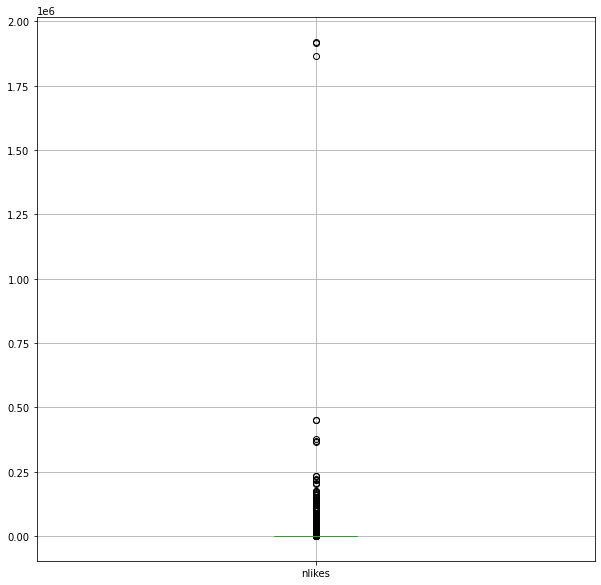

In [25]:
union.boxplot(column =['nlikes'], figsize=(10,10))

El número de me gustas en los tweets la mayoría de ellos está cerca de 0, mientras que los datos anómalos son los que más likes tienen de forma desproporcionada.

In [26]:
n_likes = union.groupby(['username'])['nlikes'].count().reset_index()
n_likes.sort_values('nlikes',ascending=False)
union[union['username'] == 'latimes'][['join_date','date','tweet','followers','following']].sort_values('date', ascending=False)
union[union['username'] == 'latimes'][['nlikes']]

,nlikes
31740,1419
31741,1852
31742,19
31743,6
31744,26
...,...
33147,37
33148,40
33149,8
33150,3


### Retweets

#### ¿La cantidad de likes tiene correlación con los retweets?

In [27]:
union[['nlikes', 'nretweets']].corr()

,nlikes,nretweets
nlikes,1.00,0.92
nretweets,0.92,1.00


Al realizar la correlación entre el número de likes y el número de retweets, podemos ver que esta es bastante alta. Lo que significa que una variable podría explicar la otra. Sabiendo esto podemos eliminar una de las dos. En este caso eliminaremos los números de likes.

<AxesSubplot:>

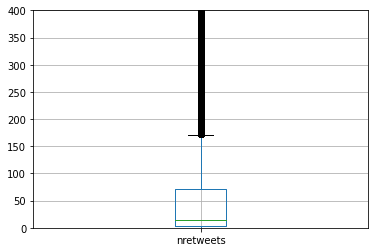

In [30]:
figura = plt.figure()
axes= figura.add_subplot()
axes.set_ylim(0,400)
tweets.boxplot(column =['nretweets'], figsize=(10,10))

De los 40000 tweets, 33000 tienen menos de 400 likes. Esto nos indica que la gran mayoría reciben pocos likes y otros tantos muchos.

In [29]:
nlikes_400 = union[union["nlikes"] < 400]["nlikes"].count()
nlikes_400

33395

In [266]:
nlikes_400_array = union["nlikes"][union["nlikes"] < 400]
nlikes_400_df = pd.DataFrame(data=nlikes_400_array, columns=["nlikes"])


<AxesSubplot:xlabel='nlikes', ylabel='Count'>

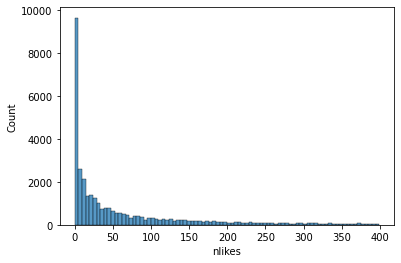

In [267]:
sns.histplot(data=nlikes_400_df, x="nlikes")

La distribución de los tweets nos indica que una gran parte tienen de ellos tienen entre 0 y 100 tweets.

### Idiomas

Vamos a observar cuantos tweets hay para cada idioma.

In [268]:
union['language'].unique()
union.groupby(['language'])['language'].count().sort_values(ascending=False).to_frame()

,language
language,
en,30614
es,3362
ar,2392
und,1548
pt,1392
tr,308
hi,261
in,248
fr,158


Al estar la mayoría en inglés, **considero que no tendrá demasiada implicación** en saber si el tweet tendrá repercusión.

### Tweets

#### Top twiteros

Vamos a hacer una lista con los 10 que más tweets tienen.

In [269]:
union.groupby(['tweets','username'])['username'].count().sort_index(ascending=False).head(10)

tweets  username      
508811  Slate              911
443030  nytimes            718
436279  mashable           780
431779  FoxNews            510
398883  washingtonpost     778
380692  lopezdoriga        903
376286  TIME               373
370605  latimes           1412
356467  politico           133
355742  ABC                827
Name: username, dtype: int64

Vemos que los que más tweets tienen están muy lejos de la gran mayoría. Estos suelen ser cuentas de noticias, por lo que su repercusión parece ser mayor.

### Seguidores

In [270]:
# headers.boxplot(column =['followers'], figsize=(10,10))

El que más seguidores tiene sobrepasa los 100 millones.

In [271]:
union["followers"].max()

129909278

In [272]:
followers_median = union["followers"].median()
followers_median

4878881.0

Vamos a acortar el número de seguidores a la mediana.

In [273]:
followers_array = union["followers"][union["followers"] < followers_median]
followers_df = pd.DataFrame(data=followers_array, columns=["followers"])

<AxesSubplot:xlabel='followers'>

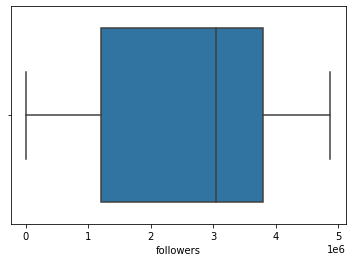

In [274]:
sns.boxplot(x=followers_df["followers"])

**Al parecer muchas de las cuentas tienen muchos seguidores, por lo que es un variable a tener muy encuenta para nuestro modelo.**

## Variables Independientes para el Modelo

Aquellas variables que no son numéricas, las convierto en True/False para poder analizarlas.

In [275]:
# Si tiene urls
union["have_urls"] = union["urls"] != "[]"

# Si contiene videos
union["have_video"] = union["video"] != 0

# Si tiene fotos
union["have_photos"] = union["urls"] != "[]"

# Si contiene hashtags
union["have_hashtags"] = union["hashtags"] != "[]"

# Cuando la Bio es superior a 90 caracteres
union["large_bio"] = union["bio"].str.len() >= 90



Podemos ver ciertas correlaciones entre datos. Por ejemplo, si tiene urls y video.

In [276]:
union[['have_urls', 'have_video']].corr()

,have_urls,have_video
have_urls,1.00,-0.14
have_video,-0.14,1.00


In [277]:
union[['have_hashtags', 'have_urls']].corr()

,have_hashtags,have_urls
have_hashtags,1.00,-0.16
have_urls,-0.16,1.00


No existen correlaciones entre tener hastahgs y urls en el tweet.

Miramos cuantos hay que tengan una Bio mayor de 100 caracteres.

In [278]:
union["large_bio"].value_counts()
union[union['bio'].str.len() >= 100].count()

id_x                19011
name_x              19011
username            19011
bio                 19011
url                 17117
join_datetime       19011
join_date           19011
join_time           19011
tweets              19011
location            14153
following           19011
followers           19011
likes               19011
media               19011
private             19011
verified            19011
avatar              19011
background_image    18960
id_y                19011
conversation_id     19011
created_at          19011
date                19011
timezone            19011
place                   9
tweet               19011
language            19011
hashtags            19011
cashtags            19011
user_id             19011
user_id_str         19011
name_y              19011
day                 19011
hour                19011
link                19011
urls                19011
photos              19011
video               19011
thumbnail            3957
retweet     

### Día de la semana

El día de la semana puede ser un dato relevante. Por ello vamos a extraerlo.

La fecha está en formato string como podemos observar

In [279]:
tweets['date'][0]

'2021-08-12 00:52:14'

Podemos convertir ese string en formato fecha, para así poder obtener el día de la semana

In [280]:
from datetime import datetime
print(datetime.strptime(tweets['date'][0], '%Y-%m-%d %H:%M:%S').isoweekday())

4


In [281]:
tweets['date'].isnull().sum()

0

In [282]:
def calcular_dia(fecha):
    return datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S').isoweekday()

tweets['dia_semana'] = tweets['date'].aggregate([calcular_dia])

tweets[["dia_semana"]]

,dia_semana
0,4
1,2
2,2
3,2
4,2
...,...
40576,2
40577,2
40578,2
40579,2


Podemos observar que los miércoles parecen tener más tweets de lo habitual, y que el fin de semana parece decaer.

In [283]:
tweets['dia_semana'].value_counts().sort_index()

1    5624
2    6092
3    7145
4    6343
5    6550
6    4509
7    4318
Name: dia_semana, dtype: int64

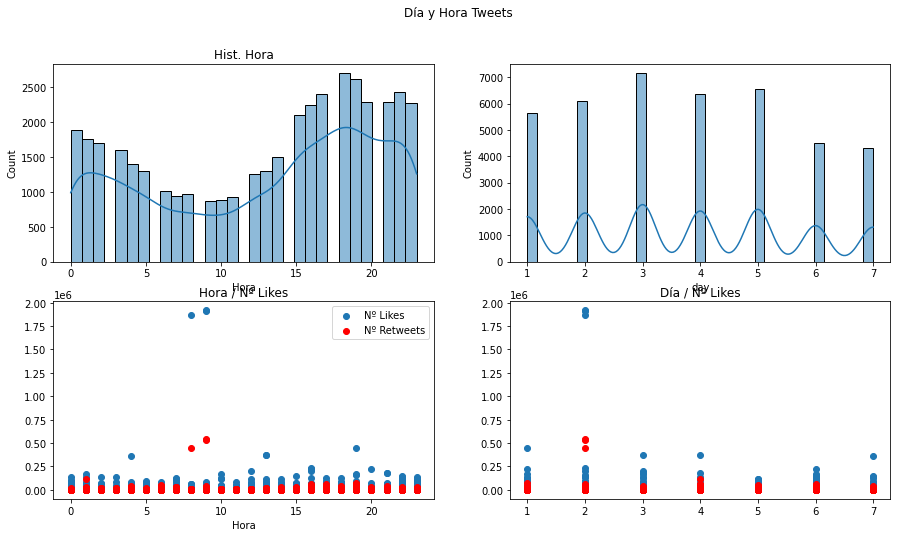

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns

figura = plt.figure(figsize=(15,8))
figura.suptitle("Día y Hora Tweets")

axes = figura.add_subplot(2,2,1)
axes2 = figura.add_subplot(2,2,2)
axes3 = figura.add_subplot(2,2,3)
axes4 = figura.add_subplot(2,2,4)

axes.set_title("Hist. Hora")
axes.set_xlabel("Hora")
sns.histplot(x=tweets['hour'],ax=axes, kde=True)


sns.histplot(x=tweets['day'],ax=axes2, kde=True)

axes3.set_title("Hora / Nº Likes")
axes3.set_xlabel("Hora")
axes3.scatter(tweets['hour'].values, tweets['nlikes'].values, label="Nº Likes")
axes3.scatter(tweets['hour'].values, tweets['nretweets'].values, color="red", label="Nº Retweets")
axes3.legend()

axes4.set_title("Día / Nº Likes")
axes4.scatter(tweets['day'].values, tweets['nlikes'].values)
axes4.scatter(tweets['day'].values, tweets['nretweets'].values, color="red")

Los gráficos anteriores nos muestran lo siguiente:
- Nº de likes por hora
- Nº de likes por día de la semana
- Nº Likes/Retweets por hora
- Nº de Likes/Retweets por día de la semana

Resulta interesante observar que aunque la diferencia no sea excesivamente grande, podemos observar como existen más retweets los miércoles sobre las 9 de la mañana. Lo que puede darnos una pista patra poder predecir si tendrá repercusión.

Podemos observar que existen muchos tweets con un hashtag nulo. Por lo que nos interesa para el modelo.

In [285]:
union[union["have_hashtags"] == False ]["have_hashtags"].count()

35528

Alrededor de la mitad de tweets tiene una urls

In [286]:
union[union["have_urls"] == True ]["have_urls"].count()

22015

También muchos tienen foto.

In [287]:
union[union["have_photos"] == True ]["have_photos"].count()

22015

No hay muchos con video.

In [288]:
union[union["have_video"] == True ]["have_video"].count()

9223

## Limpieza de los Datos para Modelo

### Eliminar No interesantes

In [289]:
print(tweets.columns.tolist())

['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url', 'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest', 'dia_semana']


Para el modelo, decido quedarme con las siguientes columnas:
- day
- hour
- followers
- have_urls

Considero que estos datos son los más interesantes, ya que para predecir podemos saber el día, la hora y los seguidores. Pero no otros datos como son el número de likes que tendrá, o si tendrá o no retweets.

He considerado descartar otras variables como son si tiene hashtags, foto o link. Ya que me parece más importante si contiene una url.

In [552]:
datosInteresantes = union[['day','hour','followers','have_urls']]
df_c = datosInteresantes.copy()
df_c = df_c[df_c["followers"] < 8000000]
target = union["nretweets"][union["followers"] < 8000000]
print(df_c.count())
print(target.count())

day          26392
hour         26392
followers    26392
have_urls    26392
dtype: int64
26392


### Nulos

In [553]:
df_c.isnull().sum()

day          0
hour         0
followers    0
have_urls    0
dtype: int64

#### Separamos datos categóricos

-----
**Al final no uso "retweet", ya que no sé si el tweet va a ser retuiteado o no**

----

In [554]:
df_c.dtypes

day          int64
hour         int64
followers    int64
have_urls     bool
dtype: object

Pasamos a número la variable categórica have_urls

In [555]:
enc_ohe = OneHotEncoder()
enc_ohe.fit(df_c[["have_urls"]])

OneHotEncoder()

In [556]:
data_encoder = enc_ohe.transform(df_c[['have_urls']]).toarray()
print(data_encoder)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Creamos un DataFrame con el data_encoder

In [557]:
df_encoder = pd.DataFrame(data_encoder)
df_encoder.head()
df_encoder.isnull().sum()

0    0
1    0
dtype: int64

In [558]:
df_encoder.shape

(26392, 2)

In [559]:
df_encoder.count()

0    26392
1    26392
dtype: int64

In [560]:
df_c.shape

(26392, 4)

In [561]:
merge = pd.concat([df_c.reset_index(drop=True), df_encoder.reset_index(drop=True)],axis=1)
merge.count()
merge

,day,hour,followers,have_urls,0,1
0,3,21,94496,False,1.00,0.00
1,5,20,94496,False,1.00,0.00
2,3,23,321917,False,1.00,0.00
3,3,21,321917,False,1.00,0.00
4,3,18,321917,False,1.00,0.00
...,...,...,...,...,...,...
26387,2,13,2003463,False,1.00,0.00
26388,2,13,2003463,False,1.00,0.00
26389,2,13,2003463,False,1.00,0.00
26390,2,13,2003463,False,1.00,0.00


In [562]:
df_c = pd.concat([df_c.reset_index(drop=True),df_encoder.reset_index(drop=True)],axis=1)
df_c.drop(['have_urls'], axis=1, inplace=True)

In [563]:
df_c.count()

day          26392
hour         26392
followers    26392
0            26392
1            26392
dtype: int64

### Separar datos Entrenamiento

In [564]:
from sklearn.model_selection import train_test_split

In [565]:
df_c

,day,hour,followers,0,1
0,3,21,94496,1.00,0.00
1,5,20,94496,1.00,0.00
2,3,23,321917,1.00,0.00
3,3,21,321917,1.00,0.00
4,3,18,321917,1.00,0.00
...,...,...,...,...,...
26387,2,13,2003463,1.00,0.00
26388,2,13,2003463,1.00,0.00
26389,2,13,2003463,1.00,0.00
26390,2,13,2003463,1.00,0.00


Usaremos el 70% para el entrenamiento y el 30% para test

In [566]:
X_train, X_test, y_train, y_test = train_test_split(df_c, target, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(18474, 5)
(7918, 5)


## Entrenar Modelo

Nuestro modelo se entrenará mediante una regresión lineal.

In [567]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [568]:
# Poongo un seed para empezar siempre desde el mismo número.
np.random.seed(5)

In [569]:
model=LinearRegression()

In [570]:
model.fit(X_train, y_train) 

/home/julianmelero/twitter-ai/twai/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [571]:
predictions = model.predict(X_test)
X_tested = X_test.copy()
print(X_tested.shape)
print(predictions.shape)
X_tested['predictions'] = predictions
X_tested['Target_test'] = y_test.values

X_tested.head(25)

(7918, 5)
(7918,)


/home/julianmelero/twitter-ai/twai/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,day,hour,followers,0,1,predictions,Target_test
9688,7,2,4113045,1.00,0.00,359.29,179
20688,5,2,3802924,0.00,1.00,45.03,1
14715,1,14,3440299,0.00,1.00,42.84,23
22199,3,3,4288507,0.00,1.00,53.08,29
614,3,20,71185,1.00,0.00,308.05,9
15100,4,12,3440299,0.00,1.00,40.43,3
10999,2,10,3958678,1.00,0.00,360.95,100
25347,7,9,3588660,1.00,0.00,351.90,456
14899,5,21,3440299,0.00,1.00,39.00,2
25117,3,5,3941748,1.00,0.00,360.21,2257


## Entrenamiento alternativo

In [573]:
X_train

,day,hour,followers,0,1
7533,7,17,5041925,0.00,1.00
9636,1,18,4113045,1.00,0.00
21381,7,17,1147218,0.00,1.00
20664,5,7,3802924,0.00,1.00
10154,2,20,1945342,1.00,0.00
...,...,...,...,...,...
3046,4,2,7881571,0.00,1.00
26301,3,12,1869489,1.00,0.00
20463,6,1,3802924,0.00,1.00
18638,4,13,4192579,1.00,0.00


In [574]:
model=Sequential()
model.add(Dense(16, activation='relu',input_dim=5))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error')

In [575]:
np.random.seed(5)
tf.random.set_seed(5) 
hstory = model.fit(X_train, y_train,epochs=50) 

Epoch 1/50
578/578 [==============================] - 1s 865us/step - loss: 1349355904.0000
Epoch 2/50
578/578 [==============================] - 0s 800us/step - loss: 49765848.0000
Epoch 3/50
578/578 [==============================] - 0s 793us/step - loss: 10811270.0000
Epoch 4/50
578/578 [==============================] - 0s 783us/step - loss: 3953092.7500
Epoch 5/50
578/578 [==============================] - 0s 788us/step - loss: 3586861.2500
Epoch 6/50
578/578 [==============================] - 0s 768us/step - loss: 3320992.0000
Epoch 7/50
578/578 [==============================] - 0s 823us/step - loss: 2983568.0000
Epoch 8/50
578/578 [==============================] - 0s 771us/step - loss: 2784566.2500
Epoch 9/50
578/578 [==============================] - 0s 762us/step - loss: 2937959.7500
Epoch 10/50
578/578 [==============================] - 0s 750us/step - loss: 2757626.5000
Epoch 11/50
578/578 [==============================] - 0s 729us/step - loss: 2805432.0000
Epoch 12/50
57

In [576]:
hstory.history["loss"]

[1349355904.0,
 49765848.0,
 10811270.0,
 3953092.75,
 3586861.25,
 3320992.0,
 2983568.0,
 2784566.25,
 2937959.75,
 2757626.5,
 2805432.0,
 2747919.25,
 2739766.5,
 2801209.25,
 2939939.0,
 2845450.75,
 2909068.0,
 2868735.5,
 2771124.75,
 2794576.0,
 2757270.75,
 2760769.75,
 2765628.5,
 2756899.5,
 2759023.75,
 2756620.75,
 3403870.25,
 2756385.25,
 2778758.75,
 2778762.25,
 2758356.5,
 2755885.5,
 5025116.0,
 4364759.5,
 2755523.75,
 4869785.5,
 3855425.0,
 2777500.5,
 2758052.5,
 3208723.0,
 2829449.25,
 2872494.5,
 2808663.5,
 2812865.5,
 2786135.5,
 2854018.5,
 2754111.25,
 2899728.75,
 2855046.25,
 2864678.75]

El entramiento con esta red neuronal no ha funcionado bien, repitiendo la predicción, porque el número de seguidores es muy alto, y por lo tanto habría que normalizar este dato para que el entrenamiento diera resultados correctos. He realizado el entrenamiento con followers < 800000 y ha salido mucho mejor.

In [577]:
predictions = model.predict(X_test)
X_tested = X_test.copy()
print(X_tested.shape)
print(predictions.shape)
X_tested['predictions'] = predictions
X_tested['Target_test'] = y_test.values

X_tested.head(35)

(7918, 5)
(7918, 1)


,day,hour,followers,0,1,predictions,Target_test
9688,7,2,4113045,1.00,0.00,12.01,179
20688,5,2,3802924,0.00,1.00,12.01,1
14715,1,14,3440299,0.00,1.00,12.01,23
22199,3,3,4288507,0.00,1.00,12.01,29
614,3,20,71185,1.00,0.00,12.01,9
15100,4,12,3440299,0.00,1.00,12.01,3
10999,2,10,3958678,1.00,0.00,12.01,100
25347,7,9,3588660,1.00,0.00,12.01,456
14899,5,21,3440299,0.00,1.00,12.01,2
25117,3,5,3941748,1.00,0.00,12.01,2257


# Conclusión entrenamiento

La predicción de los datos en el modelo principal no ha sido muy bueno. Seguramente sea porque el número de seguidores sea una variable con números muy altos. 

Podemos decir que las variables usadas para el modelo, aunque no den muy buenos resultados, son de utilidad para poder ver cuantos números de retweets puede tener en distintos días, horas y si tiene o no urls.